In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\laptops.csv")

In [3]:
df.head()

,indx,Company,TypeName,Inches,touchscreen,ipspanel,retinadisplay,resolution_width,resolution_height,cpu_brand,...,Memory,hdd,ssd,flashstorage,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,1,Toshiba,Ultrabook,13.3,0,0,0,1920,1080,Intel,...,256GB SSD,0,256,0,0,Intel,HD Graphics 520,windows,1.20,72621
1,2,Apple,Ultrabook,13.3,0,1,1,2560,1600,Intel,...,128GB SSD,0,128,0,0,Intel,Iris Plus Graphics 640,macos,1.37,71379
2,3,HP,Notebook,17.3,0,0,0,1920,1080,Intel,...,128GB SSD + 1TB HDD,1024,128,0,0,Nvidia,GeForce 930MX,windows,2.50,52055
3,4,Dell,Notebook,15.6,0,0,0,1920,1080,Intel,...,1TB HDD,1024,0,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,5,HP,Notebook,15.6,0,0,0,1920,1080,AMD,...,256GB SSD,0,256,0,0,AMD,Radeon R4 Graphics,windows,1.86,21232


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indx               1272 non-null   int64  
 1   Company            1272 non-null   object 
 2   TypeName           1272 non-null   object 
 3   Inches             1272 non-null   float64
 4   touchscreen        1272 non-null   int64  
 5   ipspanel           1272 non-null   int64  
 6   retinadisplay      1272 non-null   int64  
 7   resolution_width   1272 non-null   int64  
 8   resolution_height  1272 non-null   int64  
 9   cpu_brand          1272 non-null   object 
 10  cpu_name           1272 non-null   object 
 11  cpu_speed          1272 non-null   float64
 12  Ram                1272 non-null   int64  
 13  Memory             1272 non-null   object 
 14  hdd                1272 non-null   int64  
 15  ssd                1272 non-null   int64  
 16  flashstorage       1272 

In [5]:
df.columns

Index(['indx', 'Company', 'TypeName', 'Inches', 'touchscreen', 'ipspanel',
       'retinadisplay', 'resolution_width', 'resolution_height', 'cpu_brand',
       'cpu_name', 'cpu_speed', 'Ram', 'Memory', 'hdd', 'ssd', 'flashstorage',
       'hybrid', 'gpu_brand', 'gpu_name', 'OpSys', 'Weight_kg', 'Price'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
indx,1272.0,636.500000,367.339080,1.0,318.75,636.50,954.25,1272.0
Inches,1272.0,15.130818,1.954436,10.1,14.00,15.60,15.60,35.6
touchscreen,1272.0,0.145440,0.352683,0.0,0.00,0.00,0.00,1.0
ipspanel,1272.0,0.282233,0.450263,0.0,0.00,0.00,1.00,1.0
retinadisplay,1272.0,0.013365,0.114876,0.0,0.00,0.00,0.00,1.0
resolution_width,1272.0,1894.199686,494.389426,1366.0,1600.00,1920.00,1920.00,3840.0
resolution_height,1272.0,1070.531447,284.512222,768.0,900.00,1080.00,1080.00,2160.0
cpu_speed,1272.0,2.298192,0.507680,0.9,2.00,2.50,2.70,3.6
Ram,1272.0,8.463050,5.566582,1.0,4.00,8.00,8.00,64.0
hdd,1272.0,423.132075,527.514262,0.0,0.00,0.00,1024.00,2048.0


In [7]:
[col for col in df.columns if df[col].dtypes=='object']

['Company',
 'TypeName',
 'cpu_brand',
 'cpu_name',
 'Memory',
 'gpu_brand',
 'gpu_name',
 'OpSys']

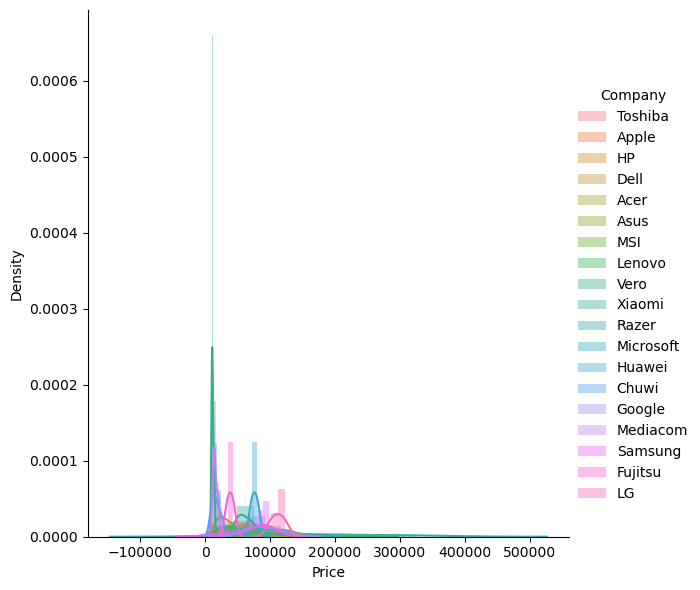

In [8]:
sns.FacetGrid(df,hue='Company',height=6).map(sns.distplot,'Price').add_legend()
plt.show()

In [9]:
df['TypeName'].value_counts()

Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: TypeName, dtype: int64

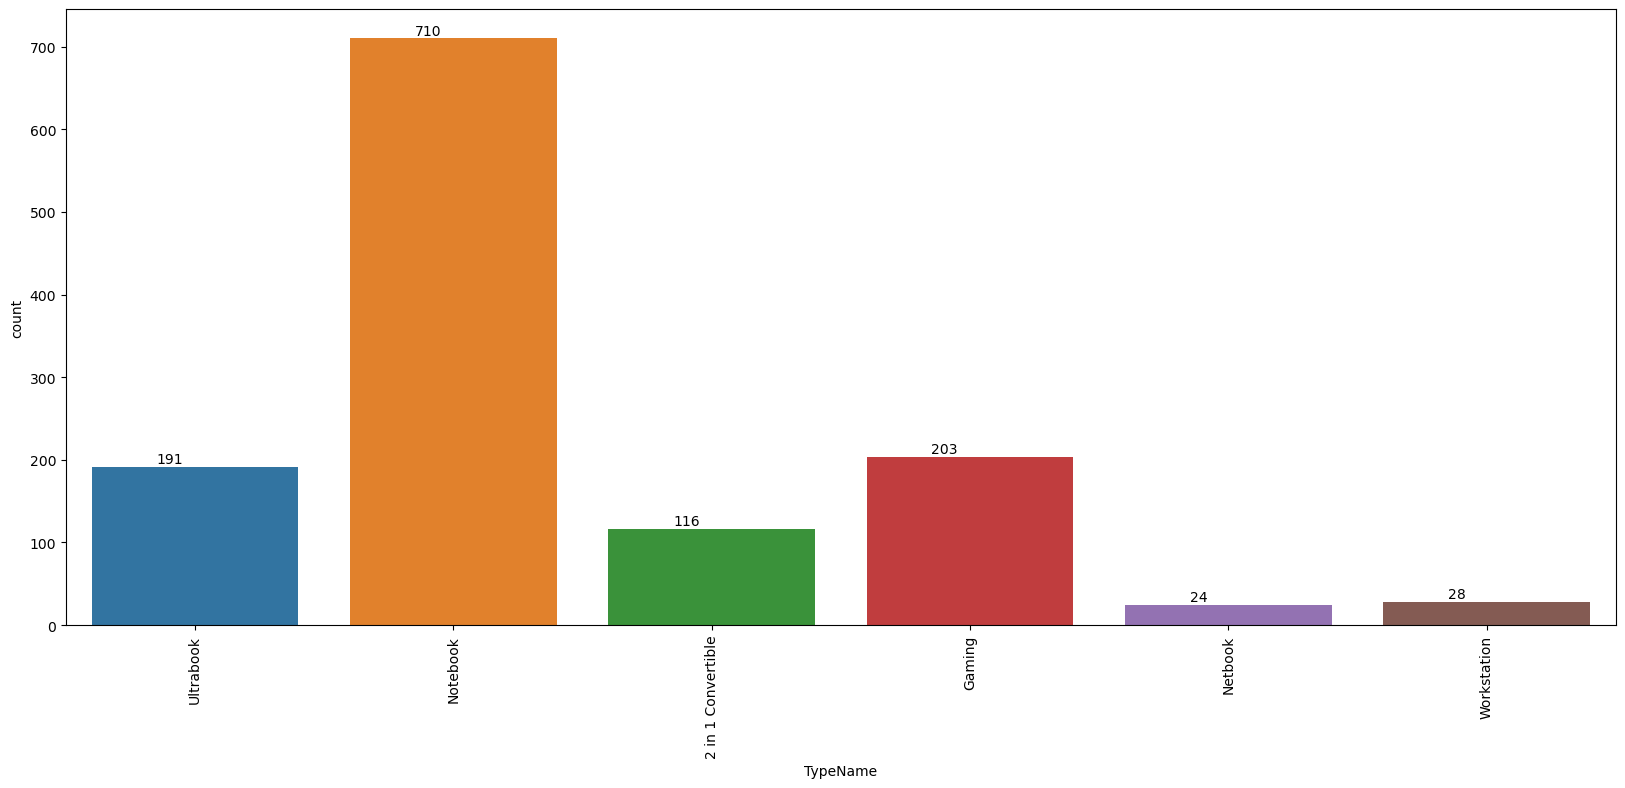

In [10]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'TypeName', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

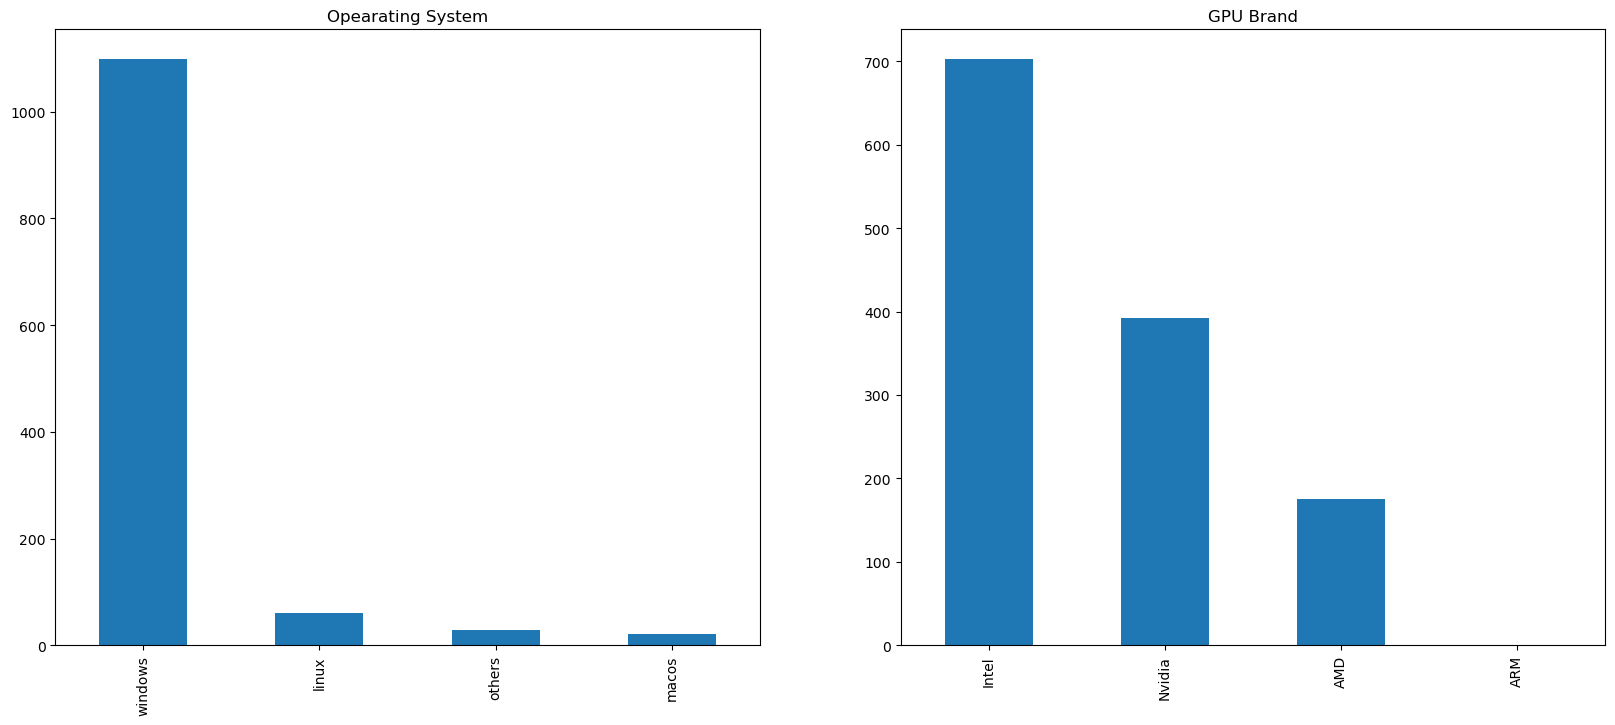

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Opearating System')
df['OpSys'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('GPU Brand')
df['gpu_brand'].value_counts().plot(kind='bar')

plt.show()

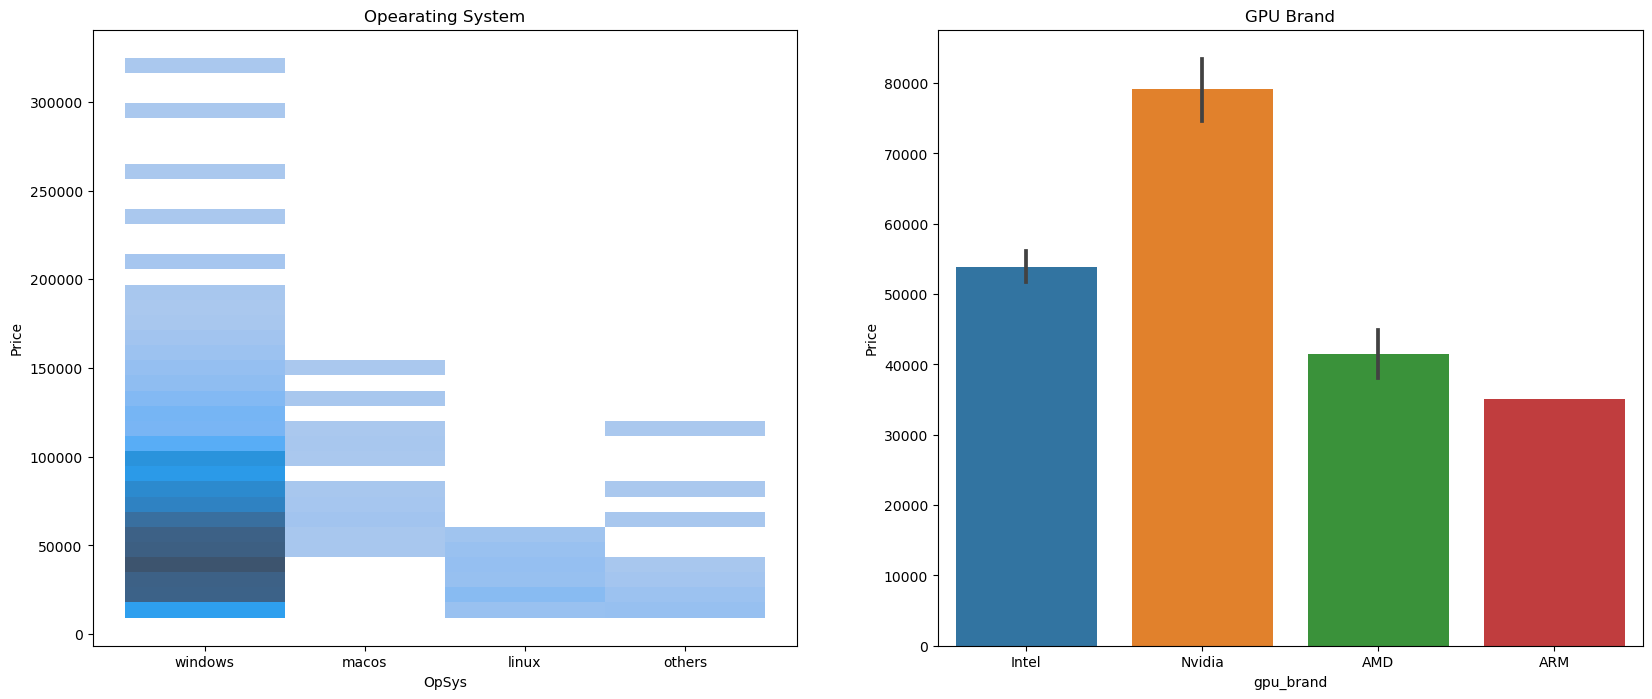

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Opearating System')
sns.histplot(x = df['OpSys'],y =df['Price'])

plt.subplot(1,2,2)
plt.title('GPU Brand')
sns.barplot(x = df['gpu_brand'],y =df['Price'])

plt.show()

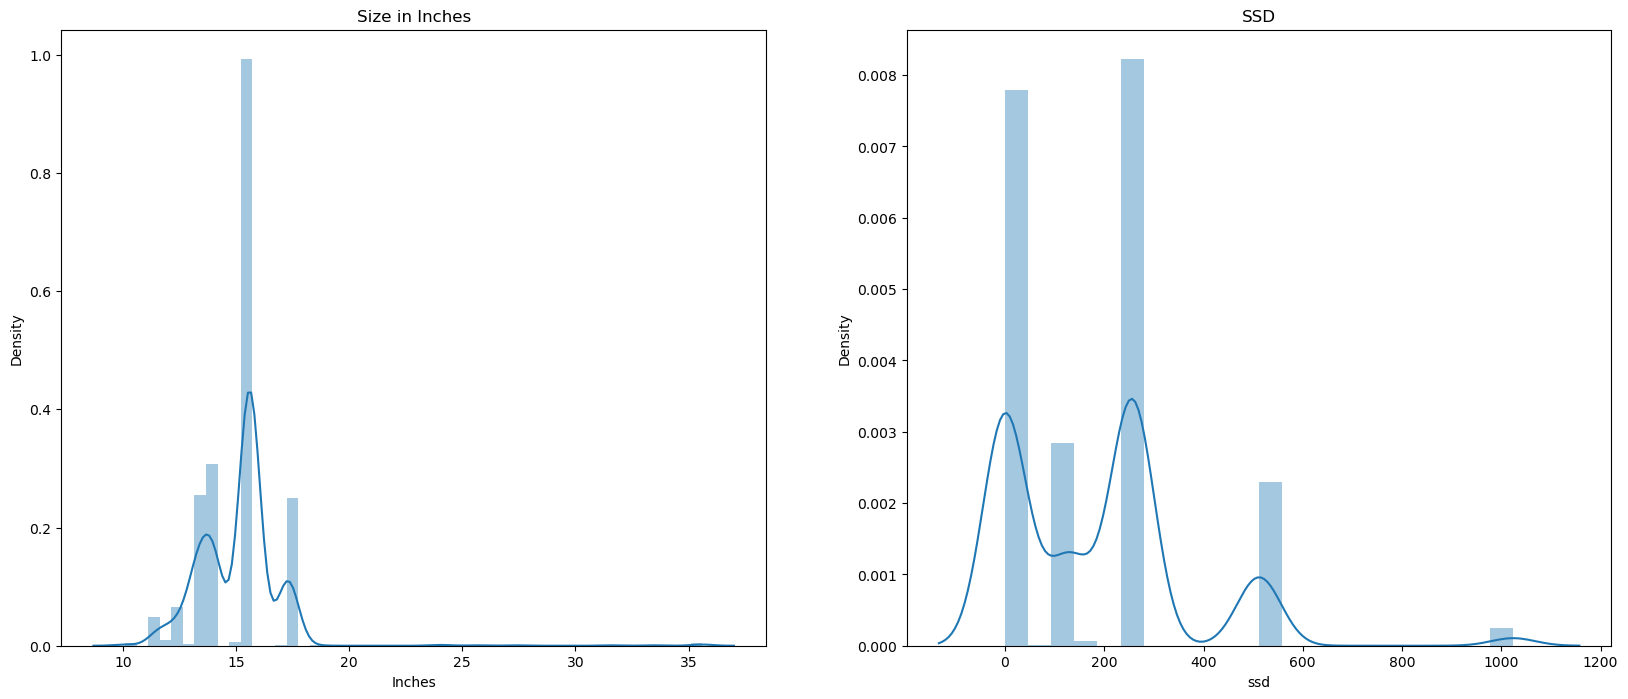

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Size in Inches')
sns.distplot(df.Inches)

plt.subplot(1,2,2)
plt.title('SSD')
sns.distplot(df.ssd)

plt.show()

<Axes: >

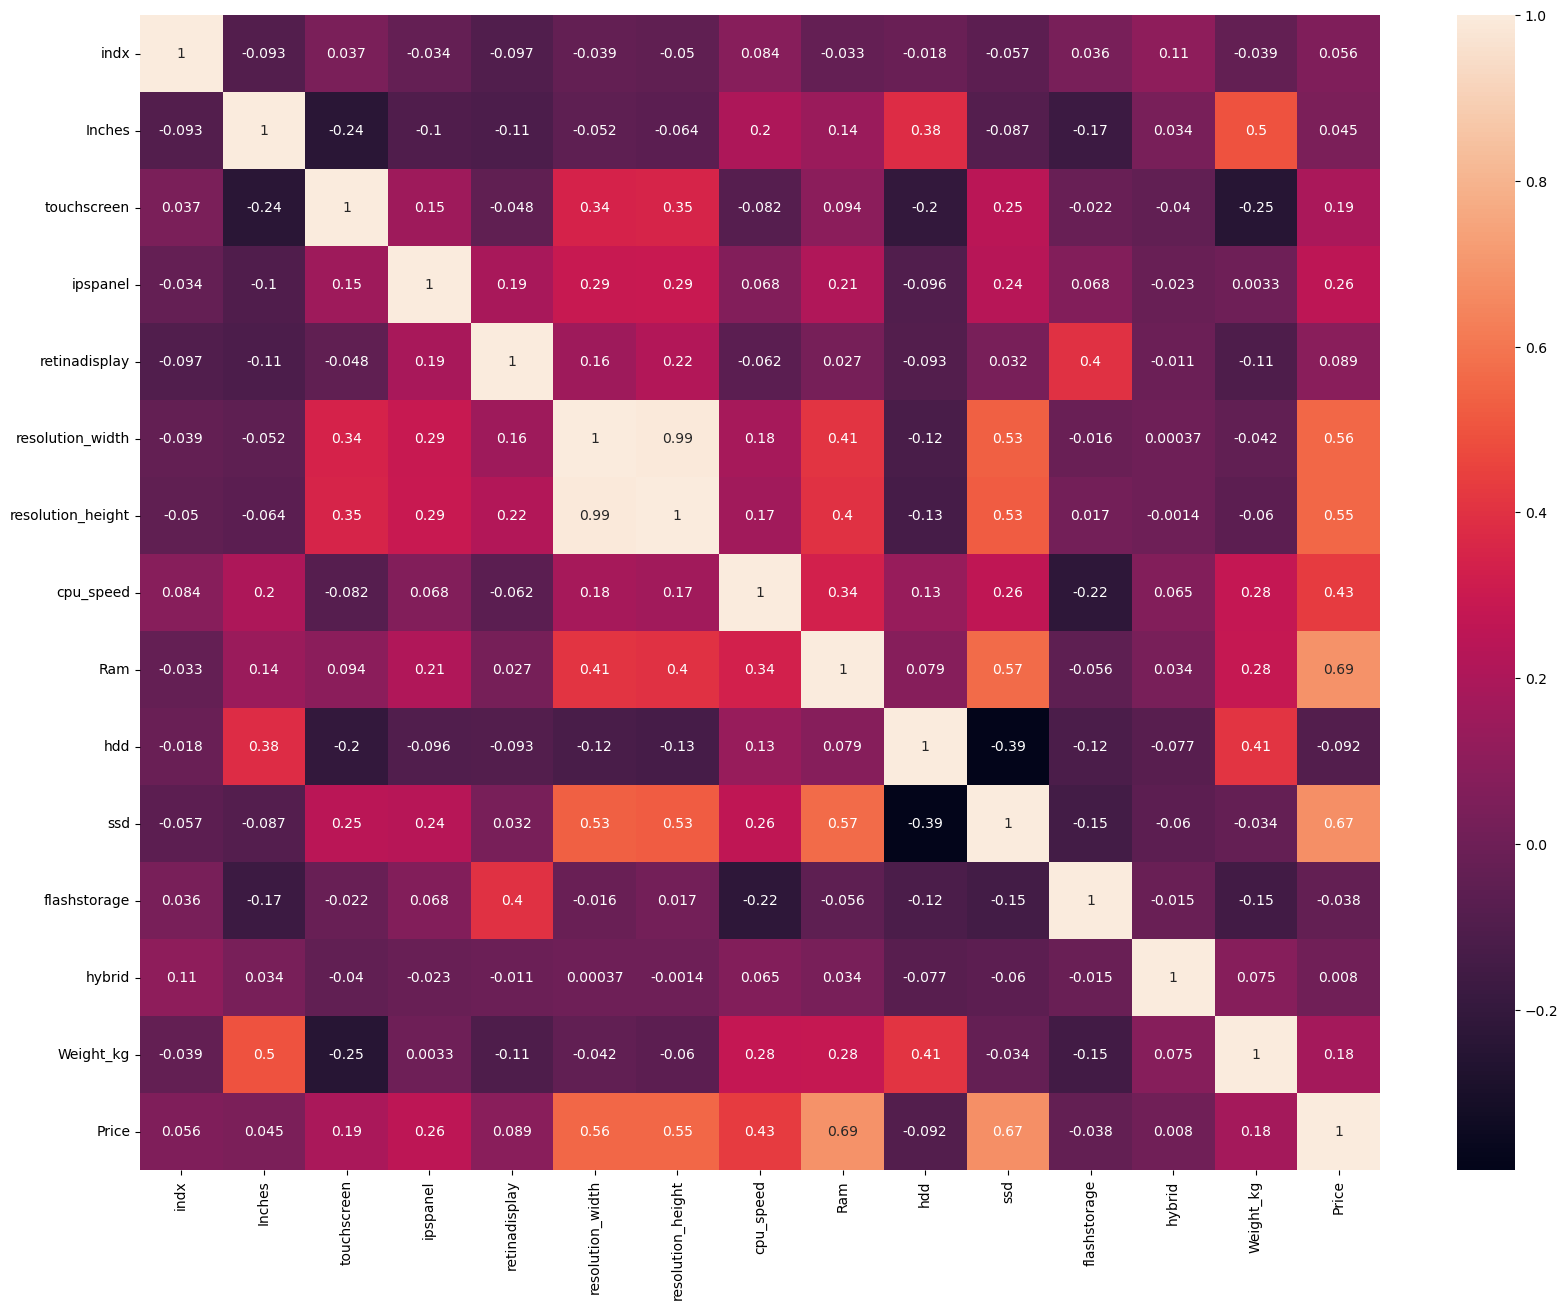

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
df.drop(['indx','ipspanel','flashstorage'],axis=1,inplace=True)

In [16]:
df

,Company,TypeName,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,Toshiba,Ultrabook,13.3,0,0,1920,1080,Intel,Core i7 6500U,2.5,8,256GB SSD,0,256,0,Intel,HD Graphics 520,windows,1.20,72621
1,Apple,Ultrabook,13.3,0,1,2560,1600,Intel,Core i5,2.3,8,128GB SSD,0,128,0,Intel,Iris Plus Graphics 640,macos,1.37,71379
2,HP,Notebook,17.3,0,0,1920,1080,Intel,Core i5 8250U,1.6,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce 930MX,windows,2.50,52055
3,Dell,Notebook,15.6,0,0,1920,1080,Intel,Core i5 7200U,2.5,4,1TB HDD,1024,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,HP,Notebook,15.6,0,0,1920,1080,AMD,A6-Series 9220,2.5,4,256GB SSD,0,256,0,AMD,Radeon R4 Graphics,windows,1.86,21232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Lenovo,Gaming,15.6,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,16,512GB SSD,0,512,0,Nvidia,GeForce GTX 960,windows,3.31,69530
1268,Asus,Gaming,17.3,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce GTX 960M,windows,3.52,69929
1269,MSI,Gaming,15.6,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,16,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce GTX 970M,windows,1.91,114732
1270,Vero,Notebook,13.3,0,0,1920,1080,Intel,Atom X5-Z8350 4,1.4,4,32GB Flash Storage,0,0,0,Intel,HD Graphics 400,windows,1.35,10443


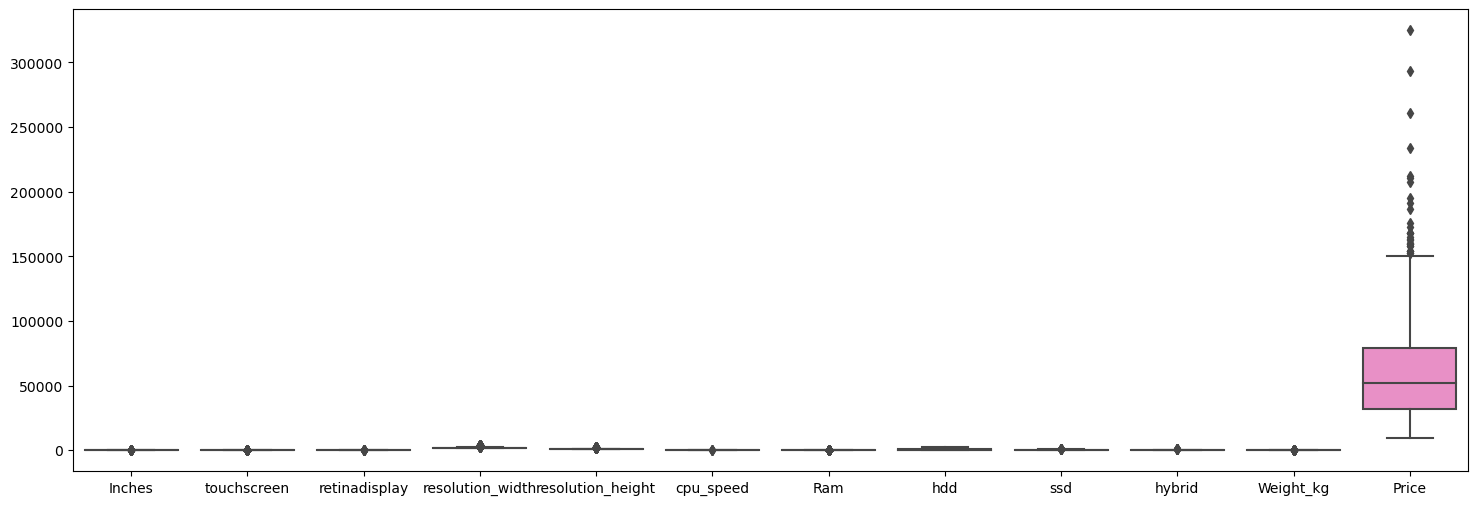

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.show()

In [18]:
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        q1 = df['Price'].quantile(0.25)
        q3 = df['Price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
    return df

In [19]:
df = remove_outliers(df,df['Price'])

In [20]:
df.isnull().sum()

Company               0
TypeName              0
Inches                0
touchscreen           0
retinadisplay         0
resolution_width      0
resolution_height     0
cpu_brand             0
cpu_name              0
cpu_speed             0
Ram                   0
Memory                0
hdd                   0
ssd                   0
hybrid                0
gpu_brand             0
gpu_name              0
OpSys                63
Weight_kg             0
Price                 0
dtype: int64

In [21]:
df['OpSys'] = df['OpSys'].fillna(df['OpSys'].value_counts()[0])

In [22]:
df.head()

,Company,TypeName,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,Toshiba,Ultrabook,13.3,0,0,1920,1080,Intel,Core i7 6500U,2.5,8,256GB SSD,0,256,0,Intel,HD Graphics 520,windows,1.20,72621
1,Apple,Ultrabook,13.3,0,1,2560,1600,Intel,Core i5,2.3,8,128GB SSD,0,128,0,Intel,Iris Plus Graphics 640,macos,1.37,71379
2,HP,Notebook,17.3,0,0,1920,1080,Intel,Core i5 8250U,1.6,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce 930MX,windows,2.50,52055
3,Dell,Notebook,15.6,0,0,1920,1080,Intel,Core i5 7200U,2.5,4,1TB HDD,1024,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,HP,Notebook,15.6,0,0,1920,1080,AMD,A6-Series 9220,2.5,4,256GB SSD,0,256,0,AMD,Radeon R4 Graphics,windows,1.86,21232


In [23]:
df = df[~(df['OpSys']=='others')]

In [24]:
df = df[~(df['OpSys']==1054)]

In [25]:
df['OpSys'].unique()

array(['windows', 'macos', 'linux'], dtype=object)

In [26]:
df.sample(5)

,Company,TypeName,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
472,MSI,Gaming,17.3,0,0,1920,1080,Intel,Core i7 7700HQ,2.8,8,256GB SSD + 1TB HDD,1024,256,0,Nvidia,GeForce GTX 1050 Ti,windows,2.70,63883
99,Asus,Ultrabook,14.0,0,0,1920,1080,Intel,Core i7 8550U,1.8,16,512GB SSD,0,512,0,Nvidia,GeForce MX150,windows,1.30,79654
559,Dell,Notebook,15.6,0,0,1920,1080,Intel,Core i5 8250U,1.6,8,256GB SSD,0,256,0,AMD,Radeon 530,windows,2.20,42486
1270,Vero,Notebook,13.3,0,0,1920,1080,Intel,Atom X5-Z8350 4,1.4,4,32GB Flash Storage,0,0,0,Intel,HD Graphics 400,windows,1.35,10443
641,Dell,Ultrabook,13.3,1,0,3200,1800,Intel,Core i5 8250U,1.6,8,256GB SSD,0,256,0,Intel,UHD Graphics 620,windows,1.23,99580


In [27]:
Mem = df['Memory'].value_counts()

In [28]:
len(Mem[Mem<=50])

27

In [29]:
Mem_Less_Than_50 = Mem[Mem<=50]

In [30]:
Mem_Less_Than_50

32GB Flash Storage               27
2TB HDD                          12
64GB Flash Storage               10
256GB SSD +  2TB HDD             10
1.0TB Hybrid                      9
256GB Flash Storage               8
512GB SSD +  1TB HDD              7
1TB SSD                           6
32GB SSD                          5
128GB Flash Storage               4
180GB SSD                         4
128GB SSD +  2TB HDD              2
512GB SSD +  2TB HDD              2
512GB Flash Storage               2
256GB SSD +  256GB SSD            2
256GB SSD +  500GB HDD            2
508GB Hybrid                      1
1.0TB HDD                         1
?                                 1
8GB SSD                           1
1TB HDD +  1TB HDD                1
512GB SSD +  512GB SSD            1
512GB SSD +  256GB SSD            1
32GB HDD                          1
64GB SSD                          1
64GB Flash Storage +  1TB HDD     1
128GB HDD                         1
Name: Memory, dtype: int64

In [31]:
df.Memory = df.Memory.apply(lambda x: 'other' if x in Mem_Less_Than_50 else x)

In [32]:
len(df['Memory'].unique())

8

In [33]:
df['Memory'].value_counts()

256GB SSD               379
1TB HDD                 192
other                   123
500GB HDD               118
512GB SSD               105
128GB SSD +  1TB HDD     88
128GB SSD                69
256GB SSD +  1TB HDD     61
Name: Memory, dtype: int64

In [34]:
df.tail()

,Company,TypeName,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
1267,Lenovo,Gaming,15.6,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,16,512GB SSD,0,512,0,Nvidia,GeForce GTX 960,windows,3.31,69530
1268,Asus,Gaming,17.3,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce GTX 960M,windows,3.52,69929
1269,MSI,Gaming,15.6,0,0,1920,1080,Intel,Core i7 6700HQ,2.6,16,128GB SSD + 1TB HDD,1024,128,0,Nvidia,GeForce GTX 970M,windows,1.91,114732
1270,Vero,Notebook,13.3,0,0,1920,1080,Intel,Atom X5-Z8350 4,1.4,4,other,0,0,0,Intel,HD Graphics 400,windows,1.35,10443
1271,HP,Notebook,15.6,0,0,1366,768,Intel,Core i3 6100U,2.3,4,500GB HDD,500,0,0,Intel,HD Graphics 520,windows,2.07,34632


In [35]:
GPU = df['gpu_name'].value_counts()

In [36]:
len(GPU[GPU<=50])

95

In [37]:
GPU_less_than_50 = GPU[GPU<=50]

In [38]:
GPU_less_than_50

 GeForce GTX 1060       42
 Radeon 530             39
 GeForce 940MX          37
 HD Graphics 500        34
 GeForce GTX 1050 Ti    26
                        ..
 Radeon R7 M465          1
 Radeon R3               1
 Radeon R7 Graphics      1
 GeForce GTX1060         1
 Radeon R5 M315          1
Name: gpu_name, Length: 95, dtype: int64

In [39]:
df['gpu_name'] = df['gpu_name'].apply(lambda x:'other' if x in GPU_less_than_50 else x)

In [40]:
CPU = df['cpu_name'].value_counts()

In [41]:
len(CPU[CPU<=50])

81

In [42]:
CPU_less_than_50 = CPU[CPU<=50]

In [43]:
df['cpu_name'] = df['cpu_name'].apply(lambda x:'other' if x in CPU_less_than_50 else x)

In [44]:
df.head()

,Company,TypeName,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,Toshiba,Ultrabook,13.3,0,0,1920,1080,Intel,other,2.5,8,256GB SSD,0,256,0,Intel,HD Graphics 520,windows,1.20,72621
1,Apple,Ultrabook,13.3,0,1,2560,1600,Intel,other,2.3,8,128GB SSD,0,128,0,Intel,other,macos,1.37,71379
2,HP,Notebook,17.3,0,0,1920,1080,Intel,Core i5 8250U,1.6,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,other,windows,2.50,52055
3,Dell,Notebook,15.6,0,0,1920,1080,Intel,Core i5 7200U,2.5,4,1TB HDD,1024,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,HP,Notebook,15.6,0,0,1920,1080,AMD,other,2.5,4,256GB SSD,0,256,0,AMD,other,windows,1.86,21232


In [45]:
df['cpu_name'].unique()

array(['other', ' Core i5 8250U ', ' Core i5 7200U ', ' Core i7 8550U ',
       ' Core i7 7700HQ ', ' Core i5 6200U ', ' Core i7 7500U '],
      dtype=object)

In [46]:
df['Memory'].unique()

array(['256GB SSD', '128GB SSD', '128GB SSD +  1TB HDD', '1TB HDD',
       '512GB SSD', '256GB SSD +  1TB HDD', '500GB HDD', 'other'],
      dtype=object)

In [47]:
e = df[[col for col in df.columns if col in ['Company', 'TypeName','cpu_brand','cpu_name','Memory','gpu_brand', 'gpu_name','OpSys']]]

In [48]:
e

,Company,TypeName,cpu_brand,cpu_name,Memory,gpu_brand,gpu_name,OpSys
0,Toshiba,Ultrabook,Intel,other,256GB SSD,Intel,HD Graphics 520,windows
1,Apple,Ultrabook,Intel,other,128GB SSD,Intel,other,macos
2,HP,Notebook,Intel,Core i5 8250U,128GB SSD + 1TB HDD,Nvidia,other,windows
3,Dell,Notebook,Intel,Core i5 7200U,1TB HDD,Intel,HD Graphics 620,windows
4,HP,Notebook,AMD,other,256GB SSD,AMD,other,windows
...,...,...,...,...,...,...,...,...
1267,Lenovo,Gaming,Intel,other,512GB SSD,Nvidia,other,windows
1268,Asus,Gaming,Intel,other,128GB SSD + 1TB HDD,Nvidia,other,windows
1269,MSI,Gaming,Intel,other,128GB SSD + 1TB HDD,Nvidia,other,windows
1270,Vero,Notebook,Intel,other,other,Intel,other,windows


In [49]:
ob = OrdinalEncoder(categories=[['Toshiba', 'Apple', 'HP', 'Dell', 'Acer', 'Asus', 'MSI', 'Lenovo',
       'Vero', 'Microsoft', 'Huawei', 'Chuwi', 'Mediacom', 'Razer',
       'Fujitsu', 'LG', 'Samsung', 'Xiaomi'],['Ultrabook', 'Notebook', '2 in 1 Convertible', 'Gaming', 'Netbook',
       'Workstation'],['Intel', 'AMD'],['other', ' Core i5 8250U ', ' Core i5 7200U ', ' Core i7 8550U ',
       ' Core i7 7700HQ ', ' Core i5 6200U ', ' Core i7 7500U '],['256GB SSD', '128GB SSD', '128GB SSD +  1TB HDD', '1TB HDD',
       '512GB SSD', '256GB SSD +  1TB HDD', '500GB HDD', 'other'],['Intel', 'Nvidia', 'AMD'],[' HD Graphics 520', 'other', ' HD Graphics 620',
       ' UHD Graphics 620', ' GeForce GTX 1050'],['windows', 'macos', 'linux']])

In [50]:
ob.fit(e)

OrdinalEncoder(categories=[['Toshiba', 'Apple', 'HP', 'Dell', 'Acer', 'Asus',
                            'MSI', 'Lenovo', 'Vero', 'Microsoft', 'Huawei',
                            'Chuwi', 'Mediacom', 'Razer', 'Fujitsu', 'LG',
                            'Samsung', 'Xiaomi'],
                           ['Ultrabook', 'Notebook', '2 in 1 Convertible',
                            'Gaming', 'Netbook', 'Workstation'],
                           ['Intel', 'AMD'],
                           ['other', ' Core i5 8250U ', ' Core i5 7200U ',
                            ' Core i7 8550U ', ' Core i7 7700HQ ',
                            ' Core i5 6200U ', ' Core i7 7500U '],
                           ['256GB SSD', '128GB SSD', '128GB SSD +  1TB HDD',
                            '1TB HDD', '512GB SSD', '256GB SSD +  1TB HDD',
                            '500GB HDD', 'other'],
                           ['Intel', 'Nvidia', 'AMD'],
                           [' HD Graphics 520', 'other', ' HD Graphics 620',
                            ' UHD Graphics 620', ' GeForce GTX 1050'],
                           ['windows', 'macos', 'linux']])

In [51]:
ob.transform(e)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       [2., 1., 0., ..., 1., 1., 0.],
       ...,
       [6., 3., 0., ..., 1., 1., 0.],
       [8., 1., 0., ..., 0., 1., 0.],
       [2., 1., 0., ..., 0., 0., 0.]])

In [52]:
a1 = pd.DataFrame(ob.transform(e),columns=['en_Company', 'en_TypeName', 'en_cpu_brand', 'en_cpu_name', 'en_Memory', 'en_gpu_brand',
       'en_gpu_name', 'enOpSys'])

In [53]:
a1.head()

,en_Company,en_TypeName,en_cpu_brand,en_cpu_name,en_Memory,en_gpu_brand,en_gpu_name,enOpSys
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0
3,3.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0
4,2.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0


In [54]:
df = pd.concat([a1.reset_index(drop=True),df.reset_index(drop=True)],axis=1)

In [55]:
df.tail()

,en_Company,en_TypeName,en_cpu_brand,en_cpu_name,en_Memory,en_gpu_brand,en_gpu_name,enOpSys,Company,TypeName,...,Ram,Memory,hdd,ssd,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
1130,7.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,Lenovo,Gaming,...,16,512GB SSD,0,512,0,Nvidia,other,windows,3.31,69530
1131,5.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,Asus,Gaming,...,8,128GB SSD + 1TB HDD,1024,128,0,Nvidia,other,windows,3.52,69929
1132,6.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,MSI,Gaming,...,16,128GB SSD + 1TB HDD,1024,128,0,Nvidia,other,windows,1.91,114732
1133,8.0,1.0,0.0,0.0,7.0,0.0,1.0,0.0,Vero,Notebook,...,4,other,0,0,0,Intel,other,windows,1.35,10443
1134,2.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,HP,Notebook,...,4,500GB HDD,500,0,0,Intel,HD Graphics 520,windows,2.07,34632


In [56]:
df.drop(['Company', 'TypeName','cpu_brand','cpu_name','Memory','gpu_brand', 'gpu_name','OpSys'],axis=1,inplace=True)

In [57]:
df

,en_Company,en_TypeName,en_cpu_brand,en_cpu_name,en_Memory,en_gpu_brand,en_gpu_name,enOpSys,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_speed,Ram,hdd,ssd,hybrid,Weight_kg,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.3,0,0,1920,1080,2.5,8,0,256,0,1.20,72621
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,13.3,0,1,2560,1600,2.3,8,0,128,0,1.37,71379
2,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,17.3,0,0,1920,1080,1.6,8,1024,128,0,2.50,52055
3,3.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,15.6,0,0,1920,1080,2.5,4,1024,0,0,2.18,35005
4,2.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,15.6,0,0,1920,1080,2.5,4,0,256,0,1.86,21232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,7.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,15.6,0,0,1920,1080,2.6,16,0,512,0,3.31,69530
1131,5.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,17.3,0,0,1920,1080,2.6,8,1024,128,0,3.52,69929
1132,6.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,15.6,0,0,1920,1080,2.6,16,1024,128,0,1.91,114732
1133,8.0,1.0,0.0,0.0,7.0,0.0,1.0,0.0,13.3,0,0,1920,1080,1.4,4,0,0,0,1.35,10443


In [58]:
X = df[[col for col in df.columns if col not in ['Price']]]
X.head()

,en_Company,en_TypeName,en_cpu_brand,en_cpu_name,en_Memory,en_gpu_brand,en_gpu_name,enOpSys,Inches,touchscreen,retinadisplay,resolution_width,resolution_height,cpu_speed,Ram,hdd,ssd,hybrid,Weight_kg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.3,0,0,1920,1080,2.5,8,0,256,0,1.20
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,13.3,0,1,2560,1600,2.3,8,0,128,0,1.37
2,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,17.3,0,0,1920,1080,1.6,8,1024,128,0,2.50
3,3.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,15.6,0,0,1920,1080,2.5,4,1024,0,0,2.18
4,2.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,15.6,0,0,1920,1080,2.5,4,0,256,0,1.86


In [59]:
y = df[[col for col in df.columns if col in ['Price']]]
y.head()

,Price
0,72621
1,71379
2,52055
3,35005
4,21232


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [61]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (794, 19)
Size_of X_test (341, 19)
Size_of y_train (794, 1)
Size_of y_test (341, 1)


In [62]:
rf = RandomForestRegressor()

In [63]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
yPred = rf.predict(X_test)

In [65]:
yPred

array([ 60935.52      ,  15545.62583333, 100537.195     ,  59558.34166667,
        48701.96828571,  36249.3825    ,  56505.93      ,  56112.385     ,
        40502.74      ,  35519.18      ,  51105.8695    ,  74815.59733333,
        90368.01      ,  57880.92      ,  63963.85      ,  19627.625     ,
        25898.832     ,  90309.48      ,  49150.99      ,  44478.47      ,
       110537.39      ,  76207.628     ,  36155.38      ,  47122.02666667,
        34916.92      ,  62906.18      ,  30979.81333333,  92754.18583333,
        65551.4       ,  37961.29      ,  92129.22      ,  15545.62583333,
        24038.75666667,  37605.17      ,  66923.98      ,  14777.52166667,
       106914.12266667,  25066.95666667,  82309.52      ,  98818.22      ,
        70924.22333333,  37360.015     ,  21775.545     ,  83249.35      ,
        59677.68247619,  75172.08      ,  60117.64      ,  25750.85333333,
        27922.44      ,  93904.35      ,  45400.82095238,  68769.11      ,
       101824.76      ,  

In [66]:
rf.score(X_test,y_test)

0.821671664575039

##### By Changing Parameters

In [67]:
rf_random = RandomForestRegressor()

hyper_random = {
    'max_depth': [25,45,65,80],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,6,9],
    'n_estimators': [50,80,120,150]
}

In [68]:
rf_random_para = RandomizedSearchCV(rf_random,param_distributions=hyper_random,cv=10)

In [69]:
rf_random_para.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [25, 45, 65, 80],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 6, 9],
                                        'n_estimators': [50, 80, 120, 150]})

In [70]:
rf_random_para.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 65}

In [72]:
rf_random_model = RandomForestRegressor(n_estimators=80,min_samples_split=6,min_samples_leaf= 3,max_depth=65)

In [73]:
rf_random_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=65, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=80)

In [74]:
yPred_random = rf_random_model.predict(X_test)

In [75]:
rf_random_model.score(X_train,y_train)

0.9044884765483356

In [76]:
rf_grid = RandomForestRegressor()

hyper_grid =  {
     'max_depth': [25,45,65,80],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,6,9],
    'n_estimators': [50,80,120,150]
}

In [77]:
rf_grid_para = GridSearchCV(rf_grid,param_grid=hyper_grid,cv=10)

In [78]:
rf_grid_para.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [25, 45, 65, 80],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [50, 80, 120, 150]})

In [79]:
rf_grid_para.best_params_

{'max_depth': 25,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 120}

In [80]:
rf_grid_model = RandomForestRegressor(max_depth=25,min_samples_leaf= 3,min_samples_split= 6,n_estimators=120)

In [81]:
rf_grid_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=120)

In [82]:
yPred_grid = rf_grid_model.predict(X_test)

In [83]:
rf_grid_model.score(X_train,y_train)

0.9069061710048322